In [1]:
import geopandas as gpd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shapefile_path = r"/home/vedanshi/Documents/DSML/IMD work/Narmada/NARMADA.shp"
gdf = gpd.read_file(shapefile_path)

In [3]:
print(f"Current CRS: {gdf.crs}")

Current CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",24],PARAMETER["central_meridian",80],PARAMETER["standard_parallel_1",12.4729444],PARAMETER["standard_parallel_2",35.17280555],PARAMETER["false_easting",4000000],PARAMETER["false_northing",4000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [4]:
gdf = gdf.to_crs(epsg=4326)

In [5]:
# Calculating the bounding box
bbox = gdf.total_bounds
print(f"Bounding Box: {bbox}")

Bounding Box: [72.73538871 21.38320554 81.77175067 23.78039251]


In [6]:
minx = 72
miny = 21 
maxx = 82
maxy = 24

In [7]:
nc_file = "/home/vedanshi/Documents/DSML/IMD work/Narmada/RF25_ind2005_rfp25.nc"
dataset = Dataset(nc_file, 'r')

In [8]:
print("All variable keys:")
print(dataset.variables.keys())

All variable keys:
dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])


In [9]:
latitude = dataset.variables['LATITUDE'][:]
longitude = dataset.variables['LONGITUDE'][:]
precipitation = dataset.variables['RAINFALL'][:]

In [10]:
# Create a mask for the bounding box
lat_mask = (latitude >= miny) & (latitude <= maxy)
lon_mask = (longitude >= minx) & (longitude <= maxx )

In [11]:
# Crop the precipitation data to the bounding box
precipitation_cropped = precipitation[:, lat_mask, :][:, :, lon_mask]

In [12]:
precipitation_cropped.shape

(365, 13, 41)

In [19]:
precipitation_day1 = precipitation_cropped[0]

In [20]:
precip_day1 = precipitation_day1.filled(fill_value=0)

In [21]:
precipitation_day1

masked_array(
  data=[[--, --, --, 0.22223447263240814, 0.1313149780035019, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, --, 0.2076723873615265, 0.293323814868927,
         0.17926514148712158, 0.11541277170181274, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, --, 0.10425394773483276, 0.0, 0.0, 0.10043452680110931,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [16]:
precip_day1

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.00424153e-01, 6.65800989e-01, 1.67159700e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.59585387e-01,
        3.15976948e-01, 3.90224028e+00, 1.03461685e+01, 1.76983891e+01,
        1.78050652e+01, 7.82403135e+00, 3.80161703e-01, 3.10894990e+00,
        1.78961391e+01, 1.76310196e+01, 9.41101074e+00, 1.66753924e+00,
        6.04538262e-01, 5.94529629e-01, 9.70151305e-01, 9.41737652e-01,
        6.30214512e-01, 1.32205963e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,

In [22]:
# Check for NaN values
nan_values = np.isnan(precip_day1)

# Check for infinity values
inf_values = np.isinf(precip_day1)

# To count the number of NaN and infinity values
nan_count = np.sum(nan_values)
inf_count = np.sum(inf_values)

print(f"Number of NaN values: {nan_count}")
print(f"Number of infinity values: {inf_count}")

Number of NaN values: 0
Number of infinity values: 0


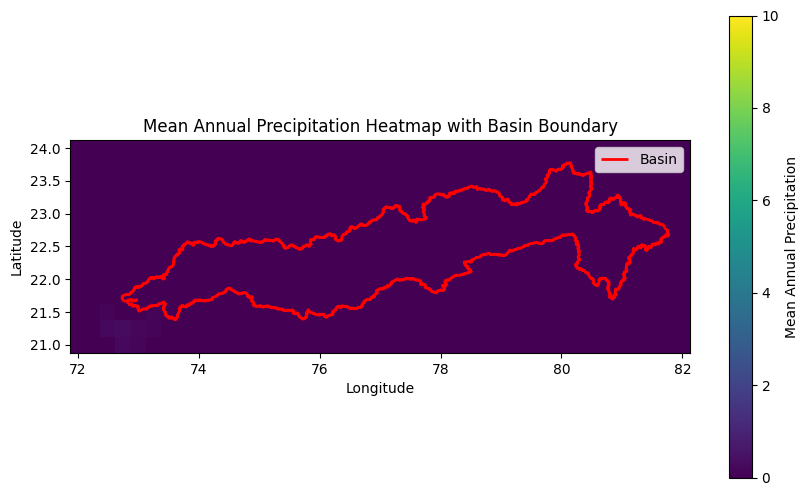

In [23]:
colorbar_min = 0  # replace with your desired minimum value
colorbar_max = 10  # replace with your desired maximum value

fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
# Add vmin and vmax to set the range of the colorbar
c = ax.pcolormesh(longitude[lon_mask], latitude[lat_mask], precip_day1, 
                  shading='auto', vmin=colorbar_min, vmax=colorbar_max)
# Add the colorbar
fig.colorbar(c, ax=ax, label='Mean Annual Precipitation')

# Overlay the basin boundary, make sure to specify the same Axes object `ax`
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')

# Add the legend
ax.legend()


# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Mean Annual Precipitation Heatmap with Basin Boundary')

# Display the plot
plt.show()